In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
train_ds = image_dataset_from_directory(
    'data/tiled_images/keras',
    batch_size=32,
    subset='training',
    seed=123,
    validation_split=0.3
).map(lambda x, y: (x/255, y))

val_ds = image_dataset_from_directory(
    'data/tiled_images/keras',
    batch_size=32,
    subset='validation',
    seed=123,
    validation_split=0.3
).map(lambda x, y: (x/255, y))

Found 378307 files belonging to 2 classes.
Using 264815 files for training.
Found 378307 files belonging to 2 classes.
Using 113492 files for validation.


In [3]:
# train_ds = image_dataset_from_directory(
#     'data/keras_subset',
#     batch_size=32,
#     subset='training',
#     seed=123,
#     validation_split=0.2
# ).map(lambda x, y: (x/255, y))

# val_ds = image_dataset_from_directory(
#     'data/keras_subset',
#     batch_size=32,
#     subset='validation',
#     seed=123,
#     validation_split=0.2
# ).map(lambda x, y: (x/255, y))

In [4]:
model1 = keras.models.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(2),    
    Flatten(),
    Dense(1, activation='sigmoid')
])

es = EarlyStopping(monitor = 'val_loss', patience = 3)
cp = ModelCheckpoint(filepath='models/model1_checkpoint.keras', monitor='val_acc', save_best_only=True, mode='max', verbose=1)

model1.compile(loss='bce', optimizer='Adam', metrics=['acc'])

In [5]:
history1 = model1.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[es, cp])

Epoch 1/20


8276/8276 [==============================] - ETA: 0s - loss: 0.4926 - acc: 0.7717
Epoch 1: val_acc improved from -inf to 0.79487, saving model to models\model1_checkpoint.keras
8276/8276 [==============================] - 6093s 736ms/step - loss: 0.4926 - acc: 0.7717 - val_loss: 0.4541 - val_acc: 0.7949
Epoch 2/20
8276/8276 [==============================] - ETA: 0s - loss: 0.4492 - acc: 0.8027
Epoch 2: val_acc improved from 0.79487 to 0.81452, saving model to models\model1_checkpoint.keras
8276/8276 [==============================] - 5922s 716ms/step - loss: 0.4492 - acc: 0.8027 - val_loss: 0.4368 - val_acc: 0.8145
Epoch 3/20
8276/8276 [==============================] - ETA: 0s - loss: 0.4301 - acc: 0.8152
Epoch 3: val_acc improved from 0.81452 to 0.82011, saving model to models\model1_checkpoint.keras
8276/8276 [==============================] - 6208s 750ms/step - loss: 0.4301 - acc: 0.8152 - val_loss: 0.4289 - val_acc: 0.8201
Epoch 4/20
8276/8276 [======================

In [9]:
# The saved model can later be loaded using 
model1 = keras.models.load_model('models/model1_checkpoint.keras')

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

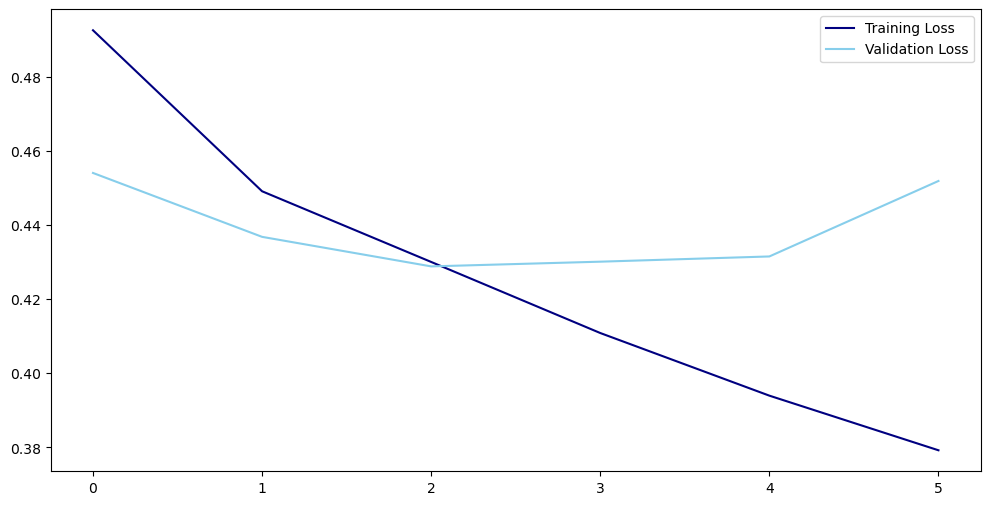

In [12]:
# Check out the plot of loss vs epoch. How's our model?
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], c='navy', label='Training Loss')
plt.plot(history1.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();